In [1]:
# Kaggle API 라이브러리 인스톨
! pip install -q kaggle

In [ ]:
# Kaggle API 호출을 위한 API Key 업로드
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [5]:
# 학습 데이터 다운로드 및 압축풀기

! kaggle datasets download -d phylake1337/fire-dataset
! unzip fire-dataset.zip

 98% 381M/387M [00:03<00:00, 136MB/s]
100% 387M/387M [00:03<00:00, 109MB/s]
Archive:  fire-dataset.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_images/fire.110.png  
  inflating: fire_dataset/fire_images/fire.111.png  
  inflating: fire_dataset/fire_images/fire.112.png  
  inflating: fire_dataset/fire_images/fire.113.png  


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [ ]:
# 데이터 프레임 만들기 (파일 위치, 레이블)

import pandas as pd
import os

# 빈 데이터프레임 생성
df = pd.DataFrame(columns=['path','label'])

# fire 이미지와 레이블 'fire'
for dirname, _, filenames in os.walk('/content/fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

# non-fire 이미지와 레이블 'non_file'
for dirname, _, filenames in os.walk('/content/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

# 학습을 위한 데이터 섞기
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

In [ ]:
# 데이터 비율 확인
import seaborn as sns
sns.########### 여기에 ################

In [ ]:
# fire 이미지 샘플 확인
import matplotlib.pyplot as plt

label = 'fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ########### 여기에 ################
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# non-fire 이미지 샘플 확인

label = 'non_fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

# 이미지 크기 조정 필요

In [ ]:
# 데이터 증강 (Augmentation)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(  
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)


In [ ]:
# 학습 집합과 검증 집합 생성
# ImageDataGenerator가 자동으로 레이블을 인코딩
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training') 
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

In [ ]:
# ImageDataGenerator가 생성한 레이블 확인

class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

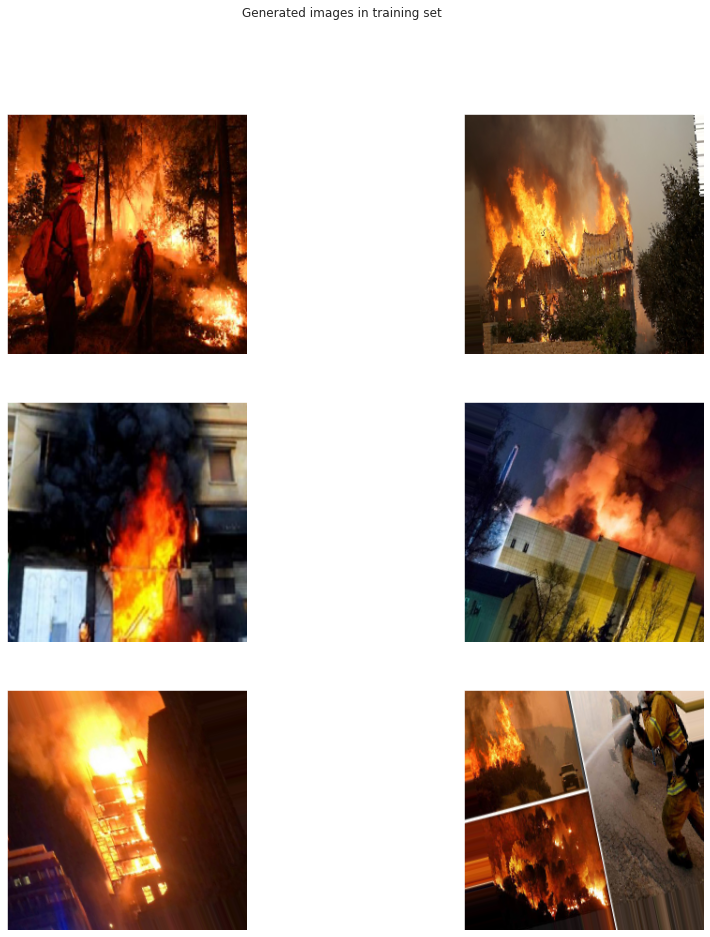

In [ ]:
# ImageDataGenerator가 생성한 이미지 확인

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# 모델 정의

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
########### 여기에 ################  #왜 3일까요?
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################
########### 여기에 ################ #왜 sigmoid일까요?

# 앞 부분에는 노이즈가 많으므로 적은 필터를 사용하고 깊은 층으로 갈수록 더 많은 특징을 추출하기 위해 필터 수를 늘입니다.

In [ ]:
# 모델 구조 요약

model.summary()

In [ ]:
# 모델 컴파일

from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

########### 여기에 ################ # 왜 binary_crossentrophy 일까요?  # 왜 Recall이 중요할까요?

In [ ]:
# 조기종료 적용

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
# 학습
########### 여기에 ################

In [ ]:
# 학습 그래프 보기

history= model.history.history
px.line(history,title = "Metrics Plot")

In [ ]:
# 모델 평가
########### 여기에 ################
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

# 잘한 것일까요?

직접 모델을 개발하는 대신 누군가가 만들어 놓은 사전학습 모델을 사용해 봅시다.

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout


# 사전학습 모델 다운로드 및 산불화재탐지 모델 정의
########### 여기에 ################
########### 여기에 ################

#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

In [ ]:
# 모델 컴파일

model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

In [ ]:
# 학습
history2 = model2.fit(x = train_gen,batch_size=32,epochs=15,callbacks = [early_stoppping],validation_data = val_gen)


In [ ]:
# 학습 그래프 보기

px.line(history,title='Metrics Plot')

In [ ]:
# 모델 평가

eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

학습된 모델로 인터넷에서 다운로드 받은 사진을 탐지해 봅시다.

In [ ]:
# 이미지 다운로드
!curl https://static01.nyt.com/images/2021/02/19/world/19storm-briefing-texas-fire/19storm-briefing-texas-fire-articleLarge.jpg --output predict.jpg
#!curl https://transcode-v2.app.engoo.com/image/fetch/f_auto,c_limit,w_1280,h_800,dpr_2/https://assets.app.engoo.com/images/6b7V4hOYczy7ODsXQtkVAg.jpeg --output predict.jpg
#!curl https://img.seoul.co.kr/img/upload/2020/07/01/SSI_20200701210037.jpg --output predict.jpg

In [ ]:
# 다운로드 이미지 확인
img = image.load_img('predict.jpg')
img

In [ ]:
# 이미지를 모델에 입력형태로 변환

img = image.img_to_array(img)/255
########### 여기에 ################
########### 여기에 ################

print("Image Shape",img.shape)

In [ ]:
# 예측 및 결과 확인
########### 여기에 ################
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])